In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn에서의 PCA

In [2]:
# np.random.rand : 0 - 1 사이 균일 분포에서의 난수
# np.random.randn : 가우시안 표준 정규분포에서의 난수

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2) , rng.randn(2, 200)).T
X.shape

(200, 2)

In [3]:
rng.rand(2, 2)

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

In [4]:
rng.randn(2, 200)

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

(-2.346839332894307, 2.4400046646752487, -3.8591181666878738, 4.08448257499405)

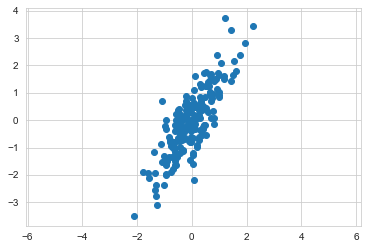

In [5]:
sns.set_style('whitegrid')

plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # x축과 y축의 1 간격을 같게 조정

In [6]:
# n_components : 표시될 주성분 개수

from sklearn.decomposition import PCA

pca = PCA(n_components= 2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [7]:
# 벡터
pca.components_ 

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

n_components를 2로 설정해두었기 때문에 2행의 행렬이 반환되었다.

각 반환된 행은 하나의 주성분이 되며, 각 주성분의 설명력은 .explained_variance_를 통해 볼 수 있다

In [8]:
# 각 주성분의 설명력
pca.explained_variance_

# [0.19548528, 0.01259639]
# [첫번째 행 주성분 설명력, 두번째 행 주성분 설명령]

array([1.82531406, 0.13209947])

In [9]:
# 각 주성분의 설명력(비율 ver)
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [10]:
pca.mean_

array([-0.03360413, -0.03527382])

In [11]:
def draw_vector(v0, v1, ax = None):
    # 그림을 그릴 matplotlib 축 
    ax = ax or plt.gca()
    # 화살표 스타일 설정
    arrowprops = dict(
                    arrowstyle = '->', # 화살표 스타일
                    linewidth = 2, # 선 굵기
                    color = 'black', # 색상
                    # 시작점(v0)과 끝점(v1)에서 선 길이를 줄이는 비율
                    shrinkA = 0,
                    shrinkB = 0,

    )
    #          텍스트 없이 그려짐, 점 위치 , 점 위치, 화살표 속성
    ax.annotate('', v1, v0, arrowprops = arrowprops)

In [12]:
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length)
    print(vector)

1.8253140622063655
[0.47802511 0.87834617]
0.13209946573762368
[-0.87834617  0.47802511]


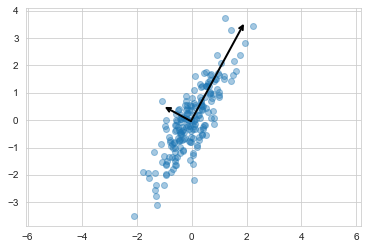

In [13]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # 3배는 화살표가 보이기 위해 임의로 설정한 값
    # pca.mean_ : 각 벡터에 대한 시작점
    # pca.mean_ + v : 끝점  
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

이제 위 두 화살표를 통해 모든 데이터를 표현할 수 있다.

데이터의 주성분을 찾았다면 주축을 변경하는 것도 가능하다

In [14]:
# n_components = 1일때

pca = PCA(n_components= 1, random_state=13)
pca.fit(X)

PCA(n_components=1, random_state=13)

In [15]:
pca.components_ , pca.mean_, pca.explained_variance_ratio_

(array([[0.47802511, 0.87834617]]),
 array([-0.03360413, -0.03527382]),
 array([0.93251326]))

In [16]:
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

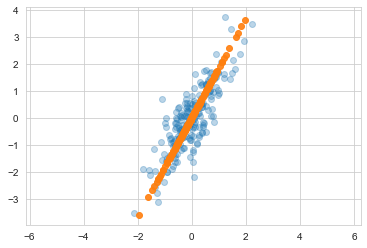

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:, 1], alpha = 0.9)
plt.axis('equal')
plt.show()

원본 데이터를 주성분이 하나인 데이터로 보았을 땐(주황색 점) 위와 같이 나타나진다.

# iris 데이터

In [18]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

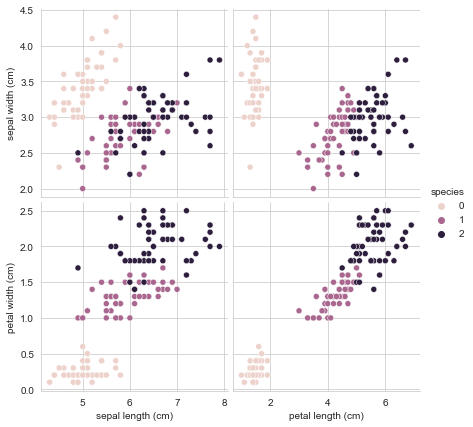

In [19]:
sns.pairplot(iris_pd, hue = 'species', height = 3, 
             x_vars = ['sepal length (cm)', 'petal length (cm)'],
             y_vars = ['sepal width (cm)', 'petal width (cm)'])

특성 4개를 한 번에 확인하기엔 어려워보인다.

pca를 한 번 적용시켜보자.

In [20]:
# pca에서는 scaler의 적용이 꽤 큰 효과를 불러 일으킨다.

from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [21]:
# pca결과를 return하는 함수

from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components= n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [22]:
# 변환

iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [23]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [24]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [25]:
# pca결과를 dataframe으로 정리하는 함수

def get_pd_from_pca(pca_data, cols = ['pca_component_1', 'pca_component_2']):
    return(pd.DataFrame(pca_data, columns = cols))

iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

pca_component_1  pca_component_2  species
0        -2.264703         0.480027        0
1        -2.080961        -0.674134        0
2        -2.364229        -0.341908        0
3        -2.299384        -0.597395        0
4        -2.389842         0.646835        0

4개의 특성이 두 개의 특성으로 정리된 데이터프레임을 볼 수 있다.

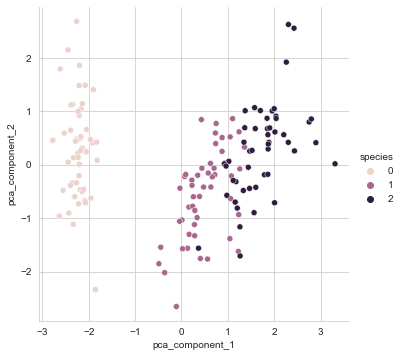

In [26]:
sns.pairplot(iris_pd_pca, hue = 'species', height = 5, 
             x_vars = ['pca_component_1'],
             y_vars = ['pca_component_2'])

어느정도 타겟 데이터를 분리할 수 있을 것 같다!

2가지의 특성을 이용했을 떄의 설명력은 아래와 같다. 이 2가지의 특성을 이용한 머신러닝은 어떤 결과를 보여줄까?

In [27]:
pca.explained_variance_ratio_ 

array([0.72962445, 0.22850762])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv = 5):
    rf = RandomForestClassifier(random_state= 13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring = 'accuracy', cv = cv)

    print("Score : ", np.mean(scores_rf))

# 4가지 특성을 모두 사용한 randomforest
# iris_ss : Standard Scaler만 적용한 iris

rf_scores(iris_ss, iris.target)

Score :  0.96


In [29]:
# 주성분 분석을 적용한 randomforest(2가지 특성 이용)

pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


데이터를 100% 반영한 것이 아니기 떄문에 정확도는 떨어질 수 밖에 없다. 하지만 데이터를 줄여서 머신러닝을 돌릴 수 있다는 인사이트를 얻어가자.

# wine 데이터

In [30]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, sep = ',', index_col=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

In [31]:
# 와인 색상 분류를 하기 위해 타겟 데이터를 'color' 컬럼으로 정함
wine_y = wine['color']
wine_X = wine.drop(['color'], axis = 1)
wine_X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [32]:
# StandardScaler 

wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [33]:
# wine 데이터는 총 12개의 컬럼을 가지고 있다.
# 앞서 했던 것처럼 2개의 주성분으로 줄여보자

pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [34]:
pca.explained_variance_ratio_ 

array([0.25346226, 0.22082117])

12 개의 컬럼을 2개로 줄였더니 총 설명력이 50%도 되지 않았다. 분석으로서 적당해보이진 않지만 그래도 시각화 해보자.

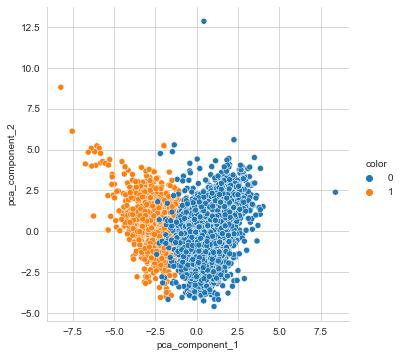

In [35]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns = pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue = 'color', height = 5, 
             x_vars=['pca_component_1'], y_vars = ['pca_component_2'])

시각화해보았을 때는 그리 나빠보이진 않는다!

In [36]:
# StandardScaler만 적용된 원 데이터로 돌린 rf
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [37]:
# 2개의 pca로 변환한 데이터로 돌린 rf
pca_X = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


두 머신러닝의 성능도 큰 차이는 없어보인다. 이번에는 주성분 3개로 표현해보자.

In [38]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print(pca.explained_variance_ratio_ )

pca_columns = ['pca_component_1', 'pca_component_2', 'pca_component_3']
pca_wine_pd = pd.DataFrame(pca_wine, columns = pca_columns)
pca_wine_pd['color'] = wine_y.values

pca_X = pca_wine_pd[['pca_component_1', 'pca_component_2', 'pca_component_3']]
rf_scores(pca_X, wine_y)

[0.25346226 0.22082117 0.13679223]
Score :  0.9832236631728548


주성분 3개로 약 60%의 데이터를 설명할 수 있고 98%의 정확도도 보였다.

3차원으로 해당 데이터를 표현해보자.

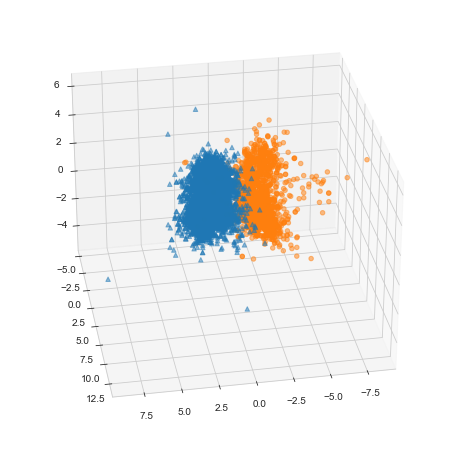

In [39]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_pd[pca_wine_pd['color'] == i]['pca_component_1']
    y_axis_data = pca_wine_pd[pca_wine_pd['color'] == i]['pca_component_2']
    z_axis_data = pca_wine_pd[pca_wine_pd['color'] == i]['pca_component_3']

    ax.scatter(x_axis_data, y_axis_data, z_axis_data,
               s = 20, alpha = 0.5, marker = marker)
    
ax.view_init(30,80)
plt.show()

In [40]:
import plotly_express as px

fig = px.scatter_3d(pca_wine_pd, x = 'pca_component_1', y = 'pca_component_2', z = 'pca_component_3',
                    color = 'color', symbol = 'color', opacity=0.4)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()

# pca eigenface

사람들의 얼굴 이미지를 분석하여 ~를 찾아내는 목적

우리는 특정 인물의 데이터 10장만 pca 실습용으로 사용할 예정.

In [41]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

In [42]:
faces_all.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [43]:
faces_all.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [44]:
# faces_all.target == K

In [45]:
# 특정 인물 선택

K = 20 # 인덱스가 20인 인물 선택
faces = faces_all.images[faces_all.target == K]
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

In [46]:
faces_all.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [47]:
len(faces)

10

In [48]:
faces.shape

(10, 64, 64)

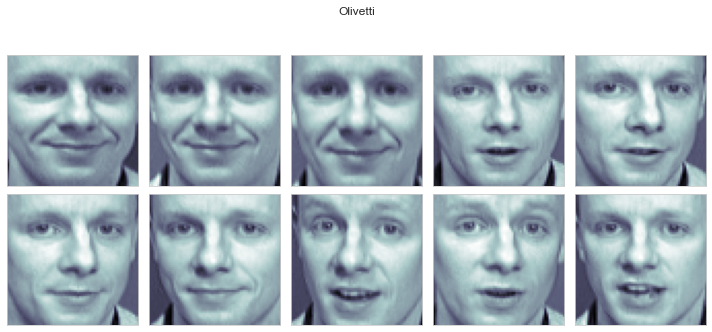

In [49]:
# 데이터 확인

import matplotlib.pyplot as plt

# 2행 5열로 그림을 그리고자 함
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, hspace = 0, wspace= 0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap = plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('Olivetti')
plt.tight_layout()
plt.show()

먼저 2개의 주성분으로 분리시켜보자

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

X = faces_all.data[faces_all.target == K] # Olivetti 데이터
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)
X_inv

array([[0.45896977, 0.51358765, 0.53748745, ..., 0.33472395, 0.414169  ,
        0.523355  ],
       [0.27795774, 0.34795368, 0.4025413 , ..., 0.13221836, 0.18065476,
        0.22391388],
       [0.34369636, 0.40215862, 0.44438416, ..., 0.24315691, 0.2896998 ,
        0.33932233],
       ...,
       [0.21585831, 0.2521426 , 0.3092816 , ..., 0.3078196 , 0.25940228,
        0.16483143],
       [0.5047528 , 0.5135679 , 0.5211307 , ..., 0.64940965, 0.64401186,
        0.6460138 ],
       [0.2267909 , 0.2636841 , 0.31928426, ..., 0.3103844 , 0.26724032,
        0.1811954 ]], dtype=float32)

In [51]:
X

array([[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.56198347, 0.55785125,
        0.5661157 ],
       [0.23553719, 0.35123968, 0.4338843 , ..., 0.06198347, 0.06198347,
        0.10330579],
       [0.32231405, 0.4090909 , 0.45454547, ..., 0.07438017, 0.2768595 ,
        0.45454547],
       ...,
       [0.28512397, 0.21900827, 0.18181819, ..., 0.5123967 , 0.2892562 ,
        0.03305785],
       [0.4752066 , 0.49173555, 0.5       , ..., 0.5661157 , 0.5785124 ,
        0.6280992 ],
       [0.1983471 , 0.23553719, 0.35123968, ..., 0.06198347, 0.12809917,
        0.09090909]], dtype=float32)

In [52]:
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

In [53]:
X.shape # 10장의 데이터가 64*64 픽셀로 이루어진 데이터였음

(10, 4096)

In [54]:
W.shape

(10, 2)

In [55]:
X_inv.shape

(10, 4096)

In [56]:
faces.shape

(10, 64, 64)


기존에 그림(faces)이 64*64 픽셀로 이루어졌으니 X_inv를 reshape해준 후 그려줘야함!

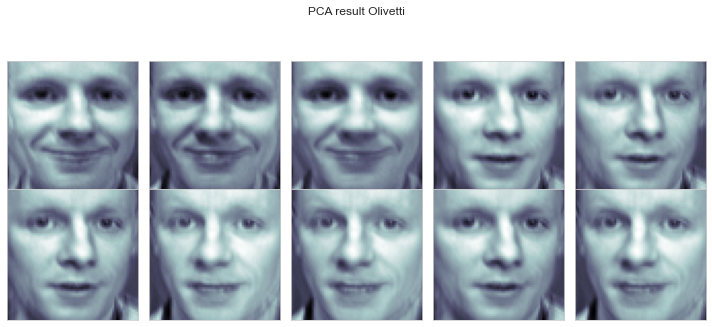

In [57]:
# 결과 확인

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace= 0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    # 기존 shape으로 돌려줘야함 
    ax.imshow(X_inv[n].reshape(64,64), cmap = plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('PCA result Olivetti')
plt.tight_layout()
plt.show()

In [58]:
X_inv[1].shape

(4096,)

사진이 약간 뭉그뜨려지긴 했지만, 표정은 대체로 잘 표현된 듯하다.

다음으론 component 변수에는 주성분의 벡터가 저장되어있는데 이들이 무슨 역할을 하는지 알아보자

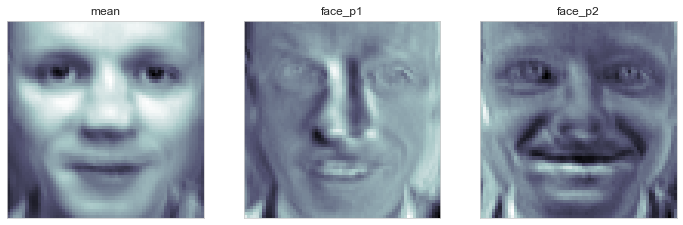

In [59]:
face_mean = pca.mean_.reshape(64,64)
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

# 첫번째 그림
plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("mean")

# 두번째 그림
plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("face_p1")

# 세번째 그림
plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("face_p2")

plt.show()

우리가 가진 10장의 사진은 mean이라는 사진에서 face_p1과 face_p2를 더한 것을 통해 모두 표현되는 것이다.

가중치를 정해보자.

In [60]:
import numpy as np

N = 2
M = 5

# 우리는 10장을 그릴 것이다.
w = np.linspace(-5, 10, N*M) # -5부터 10까지 10개의 숫자
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

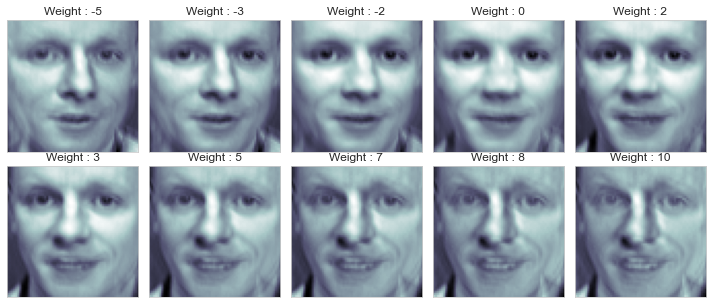

In [61]:
# 첫번째 성분 변화

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0,wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    # face_mean에서 face_p1에 가중치를 곱해서 더한 데이터
    ax.imshow(face_mean + w[n] * face_p1, cmap = plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

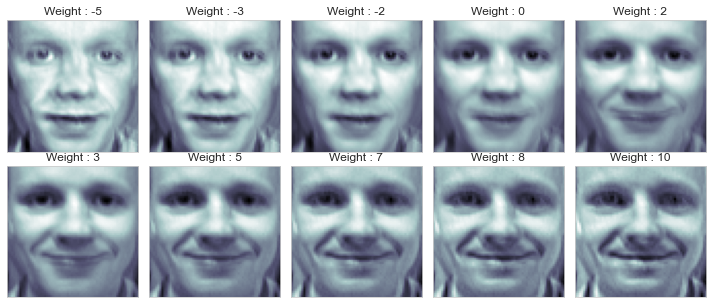

In [62]:
# 두번째 성분 변화

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0,wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    # face_mean에서 face_p1에 가중치를 곱해서 더한 데이터
    ax.imshow(face_mean + w[n] * face_p2, cmap = plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

2가지 주성분의 변화를 한 번에 관찰해보자.

In [63]:
nx, ny = (5,5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

# 앞서 추출한 가중치를 meshgrid 형태로 추출
w1, w2 = np.meshgrid(x, y) 
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [64]:
w1.shape

(5, 5)

In [65]:
face_p1.shape

(64, 64)

In [66]:
# 이미지와 결합시키기 위한 reshape
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

In [67]:
w1

array([-5.  , -1.75,  1.5 ,  4.75,  8.  , -5.  , -1.75,  1.5 ,  4.75,
        8.  , -5.  , -1.75,  1.5 ,  4.75,  8.  , -5.  , -1.75,  1.5 ,
        4.75,  8.  , -5.  , -1.75,  1.5 ,  4.75,  8.  ])

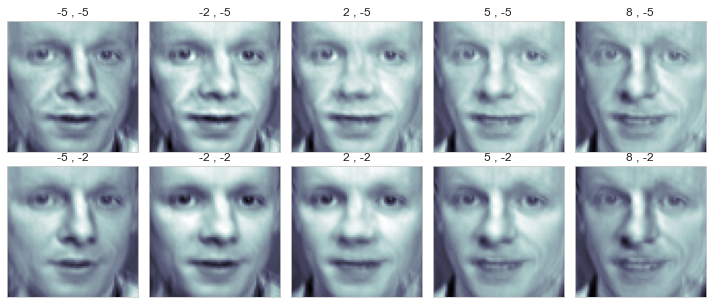

In [68]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0,wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    # face_mean에서 face_p1에 가중치를 곱해서 더한 데이터
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2 , cmap = plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title(str(round(w1[n])) + ' , ' + str(round(w2[n])))

plt.tight_layout()
plt.show()

# HAR Using PCA

In [69]:
# 데이터 읽기

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep = '\s+', header = None,
                              names = ['colum_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [70]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep = '\s+', header = None)
X_test = pd.read_csv(X_test_url, sep = '\s+', header = None)

X_train.columns = feature_name
X_test.columns = feature_name

In [71]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep = '\s+', header = None)
y_test = pd.read_csv(y_test_url, sep = '\s+', header = None)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [73]:
# pca결과를 return하는 함수

from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components= n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [74]:
# 주성분 2개로 변환
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

(7352, 2)

In [75]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [76]:
pca.mean_

array([ 0.27448812, -0.01769543, -0.10914102, -0.60543845, -0.51093756,
       -0.60475369, -0.63051213, -0.52690743, -0.60615048, -0.46860401,
       -0.30604316, -0.55712062,  0.52355074,  0.38738551,  0.5943743 ,
       -0.54756889, -0.82004093, -0.90187352, -0.84578393, -0.68434492,
       -0.64376963, -0.63106863, -0.10299256, -0.13793729, -0.16394559,
       -0.11659865,  0.10276195, -0.0377855 ,  0.13047687, -0.02622921,
        0.02632185,  0.15996554, -0.01957489,  0.00941957,  0.03329057,
        0.03658658, -0.07864015, -0.12513058, -0.19380232,  0.10500509,
        0.66412189,  0.01100604,  0.09392027, -0.96452258, -0.95368372,
       -0.93692889, -0.96533626, -0.95468342, -0.9382705 ,  0.60416484,
       -0.00328247,  0.09895917,  0.67850473,  0.02324803,  0.08061402,
       -0.07833469,  0.43671056, -0.73037943, -0.744705  , -0.96756685,
       -0.95803908, -0.94300195, -0.66750808, -0.8691348 , -0.68471511,
       -0.51577064,  0.55317723, -0.58990754,  0.62601856, -0.34

In [77]:
# pca 컬럼명 설정
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [78]:
# pca한 데이터를 데이터프레임으로 변환하는 함수

def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
    return pd.DataFrame(pca_data, columns = cols)

In [79]:
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train # 타겟 데이터

HAR_pd_pca.head()

pca_0     pca_1  action
0 -5.520280 -0.290278       5
1 -5.535350 -0.082530       5
2 -5.474988  0.287387       5
3 -5.677232  0.897031       5
4 -5.748749  1.162952       5

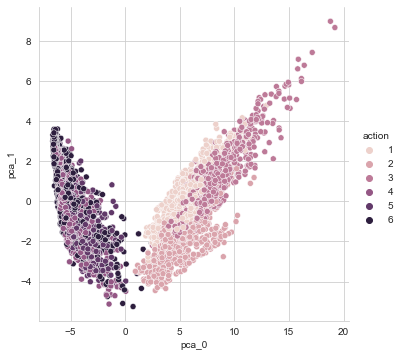

In [80]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue = 'action', height = 5, x_vars = ['pca_0'], y_vars = ['pca_1'])
plt.show()

데이터가 잘 분리되는 것처럼 보이진 않는다. 설명력을 수치로 확인해보자.

In [82]:
def print_variance_ratio(pca):
    print("variance_ratio : ", pca.explained_variance_ratio_)
    print("sum of variance_ratio : ", np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio :  [0.6255444  0.04913023]
sum of variance_ratio :  0.674674627048795


500개가 넘는 feature를 2개로 줄이니 총 설명력은 약 67% 정도이다.

주성분의 개수를 3개로 늘리면 어떻게 될까?

In [83]:
HAR_pca, pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train # 타겟 데이터

HAR_pd_pca.head()

pca_0     pca_1     pca_2  action
0 -5.520280 -0.290278 -1.529929       5
1 -5.535350 -0.082530 -1.924804       5
2 -5.474988  0.287387 -2.144642       5
3 -5.677232  0.897031 -2.018220       5
4 -5.748749  1.162952 -2.139533       5

In [84]:
print_variance_ratio(pca) # 71%로 상승하긴 함

variance_ratio :  [0.6255444  0.04913023 0.04121467]
sum of variance_ratio :  0.7158893015785985


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs= -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 2, n_jobs= -1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [86]:
# 성능 확인
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']

cv_results_df[target_col].sort_values('rank_test_score').head()

rank_test_score  mean_test_score param_n_estimators param_max_depth
1                 1         0.751224                100               6
4                 1         0.751224                100               6
19                3         0.751088                100               8
22                3         0.751088                100               8
2                 5         0.750000                200               6

In [91]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [93]:
grid_cv.best_score_

0.7512241566920566

In [87]:
# 1등 모델을 test 데이터에 적용
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1,))
## X_test는 변질되면 안되므로 fit 시키면 안됨! 바로 transform!!
pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.7573803868340685

In [90]:
from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test)]

xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(HAR_pca, y_train.values.reshape(-1,),
        early_stopping_rounds = 10, eval_set = evals)

accuracy_score(y_test, xgb.predict(pca.transform(X_test)))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 2 3 4 5 6]

In [94]:
y_train.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

ValueError: Invalid classes inferred from unique values of y. 에러 때문에 y의 라벨들을 새로 encoding 해주어야한다.

# MNIST data using PCA and KNN



필기체 인식을 하기 위한 필기체 데이터 셋인 NISt, 그 중 숫자 데이터만 모아둔 것이 MNIST 데이터셋이다.

28*28 픽셀의 0-9사이의 숫자 이미지와 레이블로 구성되어있으며 60000개의 훈련용 셋과 10000개의 실헙용 셋으로 구성되어있다.

In [95]:
df_train = pd.read_csv('./data/mnist_train.csv')
df_test = pd.read_csv('./data/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [96]:
df_train.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

타겟 데이터인 'label' 컬럼을 제외하면 28*28(= 784)의 픽셀 데이터로 이루어져있다>

In [98]:
# 데이터 분리

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

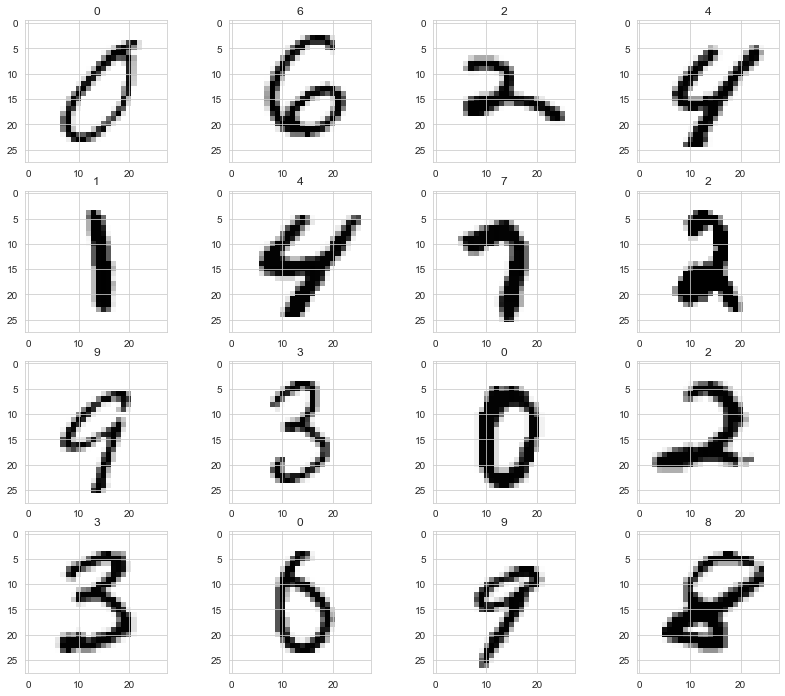

In [99]:
# 데이터 확인
# 60000개의 데이터 중 16개만 랜덤으로 살펴보자
import random
samples = random.choices(population=range(0,60000), k = 16) 

import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28,28), cmap = "Greys", interpolation = 'nearest')
    plt.title(y_train[n])

plt.show()

In [101]:
samples

[6823,
 50588,
 7933,
 44068,
 51714,
 8769,
 4876,
 25991,
 43999,
 5858,
 54942,
 49421,
 24132,
 13854,
 5595,
 51861]

이제 PCA와 KNN을 이용해 숫자를 예측해보자

In [100]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688

KNN은 모든 거리를 계산해야하기 때문에 시간이 오래 걸릴 수 있다. 이를 차원의 저주라 하는데, 이때 필요한 것이 차원을 줄여주는 PCA이다

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier())
])

parameters = {
    'pca__n_components' : [2,5,10],
    'clf__n_neighbors' : [5,10,15]
}

kf = StratifiedKFold(n_splits= 5, shuffle= True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs= -1, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [103]:
grid.best_score_, grid.best_params_

(0.9311166666666667, {'clf__n_neighbors': 10, 'pca__n_components': 10})

In [104]:
print("Best score : %0.3f" % grid.best_score_)
print("Best parameters set : ")
best_param = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s : %r" % (param_name, best_param[param_name]))

Best score : 0.931
Best parameters set : 
	clf__n_neighbors : 10
	pca__n_components : 10


In [105]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9286

앞서 20.5초가 걸렸던 정확도 측정이 2초로 줄었다!

In [106]:
# 결과 확인
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



대체로 골고루 잘 맞추고 있는 것 같다.

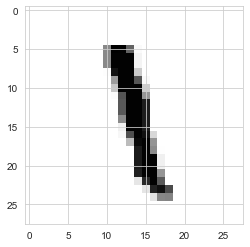

Answer is :  [1]
Real Label is :  1


In [107]:
# 실제 그림을 추출해보고 예측을 잘 했는지 알아보자.

n = 700 ## 700번째 숫자

plt.imshow(X_test[n].reshape(28,28), cmap = "Greys", interpolation ='nearest')
plt.show()

print("Answer is : " , grid.best_estimator_.predict(X_test[n].reshape(1, 784)))
print("Real Label is : ", y_test[n])

In [108]:
# 틀린 데이터는 어떤 것일까

preds = grid.best_estimator_.predict(X_test)
wrong_results = X_test[y_test != preds]
## 틀린 개수( = wrong_results.shape[0]) 중 16개만 뽑아 보겠다.
samples = random.choices(population=range(0, wrong_results.shape[0]), k = 16)

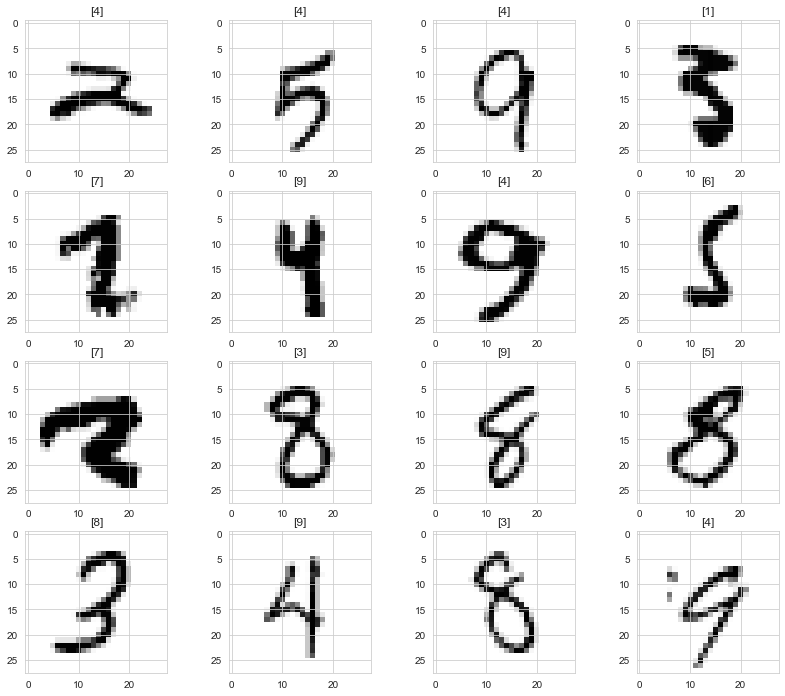

In [110]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap = "Greys")
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1,784))
    plt.title(str(pred_digit))

plt.show()

# 타이타닉 using PCA, KNN

In [111]:
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [112]:
# name 컬럼에서 분리한 title
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest   title  
0                     St Louis, MO    Miss  
1  Montreal, PQ / Chesterville, ON  Master  
2  Montreal, PQ / Chesterville, ON    Miss  
3  Montreal, PQ / Chesterville, ON      Mr  
4  Montreal, PQ / Chesterville, ON     Mrs

In [114]:
# 귀족과 평민 등급을 구분함
titanic['title']  = titanic['title'].replace('Mlle', 'Miss')
titanic['title']  = titanic['title'].replace('Ms', 'Miss')
titanic['title']  = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

성별과 신분 컬럼을 머신러닝에 이용하려면 str 타입이었던 것을 숫자형으로 바꿔주어야 한다.

따라서 LabelEncoder 진행

In [115]:
# gender 컬럼 생성

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_sex.fit(titanic['sex'])
titanic['gender'] = le_sex.transform(titanic['sex'])

le_sex.classes_

array(['female', 'male'], dtype=object)

In [116]:
# grade 컬럼 생성

le_grade = LabelEncoder()
le_grade.fit(titanic['title'])
titanic['grade'] = le_grade.transform(titanic['title'])

le_grade.classes_

array(['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m'], dtype=object)

In [117]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest   title  gender  grade  
0                     St Louis, MO    Miss       0      0  
1  Montreal, PQ / Chesterville, ON  Rare_m       1      4  
2  Montreal, PQ / Chesterville, ON    Miss       0      0  
3  Montreal, PQ / Chesterville, ON      Mr       1      1  
4  Montreal, PQ / Chesterville, ON     Mrs       0      2

In [118]:
# null 데이터 제외

titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
 14  title      1045 non-null   object 
 15  gender     1045 non-null   int64  
 16  grade      1045 non-null   int64  
dtypes: float64(3), int64(6), object(8)
memory usage: 147.0+ KB


In [119]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'grade']].astype('float')
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13)

우리는 앞서 pca를 이용한 함수 3가지를 만들어두었다.

- get_pca_data : 데이터를 n_components 개수의 주성분으로 transform 시켜주는 함수
- get_pd_from_pca : pca된 데이터를 데이터프레임으로 반환하는 함수
- print_variance_ratio : pca 설명력을 출력해주는 함수

In [120]:
# 7개의 컬럼을 2개의 주성분으로 변환
pca_data, pca = get_pca_data(X_train, n_components= 2)
print_variance_ratio(pca)

variance_ratio :  [0.93576422 0.0632686 ]
sum of variance_ratio :  0.999032828921774


In [122]:
pca_pd = get_pd_from_pca(pca_data, pca.components_.shape[0])
pca_pd['survived'] = y_train

pca_pd.head()

pca_0      pca_1  survived
0 -28.763195   4.479294       NaN
1  41.587351  22.084489       1.0
2 -19.598928 -10.999630       0.0
3 -28.232556  -6.560088       0.0
4 -29.055728  -1.510891       NaN

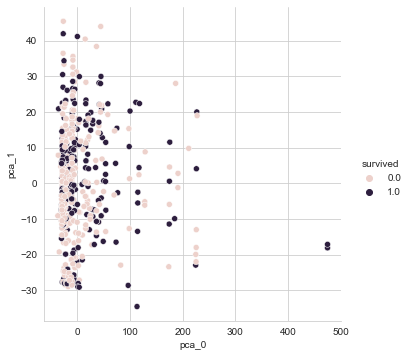

In [123]:
sns.pairplot(pca_pd, hue = 'survived', height = 5, x_vars = ['pca_0'], y_vars = ['pca_1'])

In [124]:
# 구분이 쉬울 것 같지 않아보이니 3개의 주성분으로 변환시켜보자
pca_data, pca = get_pca_data(X_train, n_components= 3)
print_variance_ratio(pca)

variance_ratio :  [9.35764225e-01 6.32686042e-02 4.06658315e-04]
sum of variance_ratio :  0.9994394872367758


In [125]:
pca_pd = get_pd_from_pca(pca_data, pca.components_.shape[0])
pca_pd['survived'] = y_train

pca_pd.head()

pca_0      pca_1     pca_2  survived
0 -28.763195   4.479294 -0.453776       NaN
1  41.587351  22.084489 -0.008602       1.0
2 -19.598928 -10.999630  0.571433       0.0
3 -28.232556  -6.560088 -1.364566       0.0
4 -29.055728  -1.510891 -0.535842       NaN

In [126]:
import plotly.express as px

fig = px.scatter_3d(pca_pd, x = 'pca_0', y = 'pca_1', z = 'pca_2',
                    color = 'survived', symbol = 'survived',
                    opacity= 0.4)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t  =0))
fig.show()

KeyError: (nan, '')

In [127]:
# pipeline 으로 survivied 예측
estimators = [
    ('scaler' , StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('clf', KNeighborsClassifier(n_neighbors=20))
]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
accuracy_score(y_test, pred)

0.7751196172248804

feature가 줄었음에도 76%의 성능을 보여주고 있다.

아래는 디카프리오라는 인물의 데이터를 집어넣어 생존율을 예측해본 것이다.

In [128]:
# ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender', 'grade']
# grade : ['Miss', 'Mr', 'Mrs', 'Rare_f', 'Rare_m']

dicaprio = np.array([[3,18,0,0,5,1,1]])
winslet = np.array([[1,16,1,1,100,0,3]])

print("Decaprio : ", pipe.predict_proba(dicaprio)[0,1])
print("Winslet : ", pipe.predict_proba(winslet)[0,1])

Decaprio :  0.1
Winslet :  0.85


/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

